輸入立委臉書粉專內容及選舉政見資料

In [1]:
import pandas as pd
import jieba
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

pd.set_option('display.max_colwidth', None)#setting the maximize string show

fb = pd.read_csv('nysu_10902_2019立委_research.csv')
politics = pd.read_csv('9th_legislator_promise.csv')
fb.page_name.unique() #觀察人名在資料集中叫什麼名字
politics.姓名.unique()

array(['吳思瑤', '姚文智', '何志偉', '蔣萬安', '李彥秀', '林昶佐', '蔣乃辛', '費鴻泰', '賴士葆',
       '呂 孫 綾', '林 淑 芬', '高志鵬', '余天', '吳 秉 叡', '蘇 巧 慧', '張 宏 陸', '羅 致 政',
       '江 永 昌', '林 德 福', '吳 琪 銘', '羅 明 才', '黃 國 昌', '蔡適應', '鄭 運 鵬',
       '陳賴素美', '陳學聖', '鄭寶清', '呂玉玲', '趙正宇', '林為洲', '柯建銘', '陳超明', '徐志榮',
       '蔡其昌', '顏寬恒', '洪慈庸', '張廖萬堅', '盧秀燕', '沈智慧', '黃國書', '何欣純', '江啟臣',
       '王惠美', '柯呈枋', '黃秀芳', '洪宗熠', '陳素月', '馬 文 君', '許 淑 華', '蘇 治 芬',
       '劉 建 國', '李 俊 俋', '蔡 易 餘', '陳 明 文', '葉宜津', '黃偉哲', '郭國文  ', '陳亭妃',
       '林俊憲', '王定宇', '邱 議 瑩', '邱 志 偉', '劉 世 芳', '林 岱 樺', '管 碧 玲', '李 昆 澤',
       '趙 天 麟', '馬 凱 妮', '賴 瑞 隆', '蘇震清', '鍾佳濱', '莊瑞雄', '陳歐珀', '蕭美琴',
       '劉櫂豪', '楊 曜', '楊鎮浯', '陳玉珍', '陳雪生', '廖國棟', '鄭天財', '陳瑩', '高金素梅',
       '簡東明', '孔文吉', nan], dtype=object)

以台北市立委賴士葆為例，建立發文文字斷詞表

In [2]:
lai = fb[fb.page_name == "賴士葆"]
lai.head(1)

,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,link_name,link_description,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count
14740,1573873889493647_2261214444092918,1573873889493647,賴士葆,公眾人物,蔡英文昨天首度透露決策過程，表示她不同意管中閔上台的立場，她說行政院在事後檢討過程時還討論可否能把核准管中閔的公文追回來，但是政務委員認為葉俊榮是於法有據。蔡英文這些說明至今仍是隱晦不明，結論就是既要面子又要裡子，知道主流民意是希望管中閔上台，但是又要迎合獨派人士的反管立場。\n\n請問1:58分的時候得知葉俊榮3點要開記者會宣布，如果真的堅決反對，一通電話就可以阻止，為什麼不打？佯裝很無辜的說，沒想到葉俊榮沒有跟她報告就開記者會宣布了，這樣好像很矯情。現在管中閔上台了，監察院立刻通過彈劾他違法兼職，這中間有什麼算計？\n \n \n \n https://newtalk.tw/news/view/2019-01-15/194723,NaN,link,https://www.facebook.com/1573873889493647/posts/2261214444092918/,2019-01-15T08:22:23+0000,2019-01-15T16:22:23,...,管中閔遭彈劾 鄉民表示「這樣算兼職？」 | 政治 | 新頭殼 Newtalk,針對台大校長管中閔過去擔任學校主管及政府部門任職時在外兼職違法事宜，監察院今（15）日通過予以彈劾。管中閔之前遭爆料疑過去擔任公職期間，以不具名方式在某週刊寫專欄，每年領取稿費達60餘萬元，幾年下來累積數.....,968,0,0,0,0,0,133,93


In [3]:
lai['new_date'] = pd.to_datetime(lai['created_time_taipei']).dt.date
lai['month_year'] = pd.to_datetime(lai['new_date']).dt.to_period('M')
lai.head(1)

<ipython-input-3-fd71a2caad7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['new_date'] = pd.to_datetime(lai['created_time_taipei']).dt.date
<ipython-input-3-fd71a2caad7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lai['month_year'] = pd.to_datetime(lai['new_date']).dt.to_period('M')


,post_id,page_id,page_name,page_category,message,story,type,permalink,created_time_gmt,created_time_taipei,...,like_count,haha_count,love_count,angry_count,sad_count,wow_count,comment_count,share_count,new_date,month_year
14740,1573873889493647_2261214444092918,1573873889493647,賴士葆,公眾人物,蔡英文昨天首度透露決策過程，表示她不同意管中閔上台的立場，她說行政院在事後檢討過程時還討論可否能把核准管中閔的公文追回來，但是政務委員認為葉俊榮是於法有據。蔡英文這些說明至今仍是隱晦不明，結論就是既要面子又要裡子，知道主流民意是希望管中閔上台，但是又要迎合獨派人士的反管立場。\n\n請問1:58分的時候得知葉俊榮3點要開記者會宣布，如果真的堅決反對，一通電話就可以阻止，為什麼不打？佯裝很無辜的說，沒想到葉俊榮沒有跟她報告就開記者會宣布了，這樣好像很矯情。現在管中閔上台了，監察院立刻通過彈劾他違法兼職，這中間有什麼算計？\n \n \n \n https://newtalk.tw/news/view/2019-01-15/194723,NaN,link,https://www.facebook.com/1573873889493647/posts/2261214444092918/,2019-01-15T08:22:23+0000,2019-01-15T16:22:23,...,968,0,0,0,0,0,133,93,2019-01-15,2019-01


In [4]:
# 依照按讚數 低到高排序
lai = lai.sort_values(by=['like_count'])
# 用新的排序當作順序
lai.reset_index(inplace=True)

結巴斷詞 jieba

1.   len(liu): 看劉櫂豪的貼文總共有幾筆
2.   list(liu['message']): 把要斷詞的內容轉成 list 格式
3.   創造一個新的dataframe叫做liu_docs，型態是pandas.core.frame.DataFrame
4.   原本liu_docs裡面的'jieba_results'欄位型態是pandas.core.series.Series，需要轉成'str'(字串)型態才能做後續處理。

In [5]:
doc_names = range(len(lai)) #有幾篇文章 : 444 篇文章
doc_names

range(0, 698)

In [6]:
lai = lai.replace(np.nan, '', regex=True) # 將nan取代成空白字串
text_list = list(lai['message']) # 把所有message轉成一個list 用for iterate

What is the difference between lcult() & cut()

In [7]:
# 先看第一個
words = jieba.lcut(text_list[5], cut_all = False) # lcut return a "list"
print(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\User\AppData\Local\Temp\jieba.cache
Loading model cost 1.686 seconds.
Prefix dict has been built succesfully.


['這', '....', '才', '是', '創新', '！', '垃圾', '車配', '電音', '真的', '不一樣', '！']


In [8]:
words = jieba.cut(text_list[5], cut_all = False) 
print(words)
#for word in words:
 #   print(word)

<generator object Tokenizer.cut at 0x000001F7DD7D7820>


把要存斷詞結果的dataframe準備好之後，就可以開始斷詞了。</br>

第一個迴圈</br> 剛才我們知道，劉櫂豪的篇數有999篇： 我們可以用一個for迴圈來跑每一篇文章，i是對應文章的意思，會從1(第一篇)跑到999(第999篇)；</br> 而text_list就是我們剛剛轉成list型態的劉櫂豪貼文內容；text_list[1]，就是取出list第一個元素(第一篇貼文)的意思。</br>

第二個迴圈</br> words存的是文章斷詞後的集合物件(object)，我們需要跑第二個for迴圈把集合裡面的字取出來，</br> word代表斷詞集合中的一個字，先把字轉換成str(字串)型態之後，字和字之間加上空格存在一起。

append加回斷詞欄位</br> 之後把text內容存到'jieba_results'這個欄位裡面，再和liu_docs合併。</br> 最後我們liu_docs，只會一個欄位jieba_results，存斷詞之後的結果。

In [9]:
import jieba
from tqdm import tqdm
import re
jieba.load_userdict("dict.txt")
punctuation = " //，：:""()\n!！？｡＂＃＄％＆＇（）＊＋－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏"""
re_punctuation = "[{}] ".format(punctuation)

# creat a df to store the jieba result
lai_docs = pd.DataFrame(columns=['jieba_results']) # 建立df
lai_docs['jieba_results'] = lai_docs['jieba_results'].astype('str')

for i in doc_names: #從第一篇到最後一篇
    words = jieba.cut(text_list[i], cut_all = False)
    text = ''
    for word in words:
        text = text + ' ' + str(word) 
    #print(words)
    #print(i) #第幾篇文章
    #print(text) #第幾篇文章的斷詞結果
    text = re.sub(re_punctuation, "", text) # 把上面那些符號從text中刪掉
    text = re.sub(r'[0-9]','',text) # 刪掉數字
    text = re.sub(r'[a-zA-Z]','',text) #刪掉英文字
#刪除文字 更多標點符號
    text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗🎉⏰💪㊙️✨🔺😁😅😍⬇🙏✅🎈🔥📱👍👊🔸📍👉📢👩📌💼]','',text)  # 注意裡面不能有空白！
    s = pd.Series({'jieba_results': text})
    lai_docs = lai_docs.append(s, ignore_index=True)#每次的斷詞結果都加回liu_docs


In [10]:
lai_docs.iloc[400:,]  #從讚數最多的檢查

,jieba_results
400,強烈 質疑 政府 部門 拒絕 就學貸款 免息 幫助 學生
401,蔡政府 回收 公投 民進黨 沉淪 到 剝奪 人民 作主 的 機會 公投 起家 的 民進黨 人 都 噤聲 只有 呂秀蓮講 公道 話
402,蔡碧仲忠黨 的 赤 誠 讓 人 咋舌 但是 再 怎麼 熱愛 民進黨 也 不應 該 用 法律 專業 來 唬 弄 全民 把 行政中立 完全 推翻
403,
404,貧富差距 連 網軍 界 都 大得 嚇人 有 的 可以 拿 標案 領 萬 有人 卻 只能 固定 月領 一萬 助日 代表 出來面 對 蟑螂 也 要 討生活 請 檢調 追查 金 流 找出 幕 後 黑手
...,...
693,民進黨 真的 是 權力中毒
694,將 阿扁 關 回去 大家 一起 來 連署 動動 手指 頭點 下去 歡迎 大家 加入 賴士葆 的 @
695,將阿扁關回中監 木新 市場 聯署
696,請 大家 都 來 動員 支持 韓國瑜 參選 總統 並 羸得 最後勝利


In [11]:
lai['jieba_results'] = lai_docs
lai_post = lai[['new_date','message','jieba_results','like_count']]
lai_post

,new_date,message,jieba_results,like_count
0,2019-04-18,,,21
1,2019-12-18,,,28
2,2019-03-09,好有創意！\n\n世界經濟論壇 (World Economic Forum) PO 出這樣一則影片，挪威一個叫做Rjukan的小鎮，由於身處峽谷之中，一年有很多時間照不到陽光，於是他們裝了好幾片大鏡子，讓陽光能夠反射到小鎮裡，帶給大家光明與希望。\n\n#不過鏡子不便宜要85萬美金,好 有 創意 世界經濟論壇 出 這樣 一則 影片 挪威 一個 叫做 的 小鎮 由於 身處 峽谷 之中 一年 有 很多 時間 照不到 陽光 於 是 他們 裝了 好 幾片 大鏡子 讓 陽光 能夠 反射 到 小鎮裡 帶給 大家 光明 與 希望 不過 鏡子 不 便宜 要 萬 美金,79
3,2019-01-12,今早跟粉絲們分享在美國消費性電子展 (CES)上展出的自動摺衣服機後，很高興的跟老婆說分享。沒想到老婆平淡的回了我一句：「有你就夠啦！」我被打臉了...哭哭....哈哈！\n\n#國家政策是以核養綠\n#我家政策是以手養綠\n#老婆說的話都要聽從,今早 跟 粉絲們 分享 在 美國 消費性 電子展 上 展出 的 自動 摺 衣服 機 後 很 高興 的 跟 老婆 說 分享 沒 想到 老婆 平淡 的 回 了 我 一句 有 你 就夠 啦 我 被 打 臉 了 哭哭 哈哈 國家 政策 是 以 核養 綠 我家 政策 是 以 手養 綠 老婆 說 的 話 都 要 聽 從,108
4,2019-05-10,媒體報導賴清德在日本訪問表示，若當選總統將推動日本食品進口解禁，接著賴清德辦公室更正說：「這樣的說法與事實不符。」賴清德表示要尊重公投的結果，兼顧國人在意的食安問題，然後又說也要兼顧與其他國家的國際貿易，他說：「國際有一定標準，台灣要參加CPTPP(跨太平洋夥伴全面進展協定)，也要根據國際標準，不可以自設門檻，這樣沒辦法參加CPTPP。」這就是政治人物的兩面手法，想要討好選票，又要討好日本人，到底怎麼兼顧，這兩者之間就是悖逆不能共存的，不想犧牲國人的健康，不希望吃核災食品就是自設門檻，這是什麼道理！民進黨政府一向是嘴巴說尊重公投的結果，但是實際上不理會公投的結果，同婚議題和以核養綠照樣我行我素就是證明。\n\nhttps://udn.com/news/amp/story/12539/3508726,媒體 報導 賴清德 在 日本 訪問 表示 若 當選 總統 將 推動 日本 食品 進口 解禁 接著 賴清德 辦公室 更正 說 這樣 的 說 法 與 事實 不符 賴清德 表示 要 尊重 公投 的 結果 兼顧 國人 在意 的 食安 問題 然 後 又 說 也 要 兼顧 與 其他 國家 的 國際 貿易 他 說 國際 有 一定 標準 台灣 要 參加 跨 太平洋 夥伴 全面 進展 協定 也 要 根據 國際標準 不 可以 自設 門檻 這樣 沒 辦法 參加 這 就是 政治 人物 的 兩面 手法 想要 討好 選票 又 要 討好 日本 人 到底 怎麼 兼顧 這兩者 之間 就是 悖逆 不能 共存 的 不想 犧牲 國人 的 健康 不 希望 吃 核災 食品 就是 自設 門檻 這是 什麼 道理 民進黨 政府 一向 是 嘴巴 說 尊重 公投 的 結果 但是 實際 上 不理 會 公投 的 結果 同婚 議題 和 以 核養 綠照樣 我行我素 就是 證明,148
...,...,...,...,...
693,2019-06-24,民進黨真的是「權力中毒」！,民進黨 真的 是 權力中毒,10494
694,2019-03-28,將阿扁關回去，大家一起來連署! \n動動手指頭點下去 👉 http://abao.tw/ab/\n\n歡迎大家加入賴士葆的Line@：http://abao.tw/line,將 阿扁 關 回去 大家 一起 來 連署 動動 手指 頭點 下去 歡迎 大家 加入 賴士葆 的 @,11096
695,2019-03-24,「將阿扁關回中監」木新市場聯署,將阿扁關回中監 木新 市場 聯署,12125
696,2019-07-17,請大家都來動員支持韓國瑜參選總統並羸得最後勝利！,請 大家 都 來 動員 支持 韓國瑜 參選 總統 並 羸得 最後勝利,15618


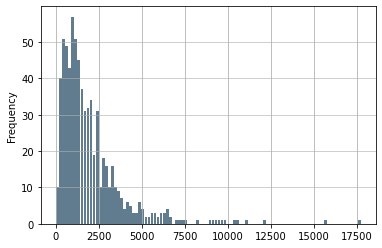

In [12]:
# 看讚數的分佈 y 軸是該讚數的貼文數 來看我們要怎麼取哪個讚數區間資料
commutes = lai_post['like_count']
commutes.plot.hist(grid=True, bins=100, rwidth=0.9,
color='#607c8e')
plt.grid(axis='y', alpha=0.75)

In [13]:
temp = lai_post[(lai_post['like_count'] <= 5000) & (lai_post['like_count'] > 1000)] #讚數大於500 小於1000才取 : 201  篇文章
temp

,new_date,message,jieba_results,like_count
223,2019-08-27,廢核是民進黨的神主牌，卻硬要全民跟著膜拜，只有透過催眠和洗腦，人民清醒過來才發現廢核家園變成肺咳家園。\n#藻礁換深澳依然要籌組敗選者內閣\n#呼籲執政黨推動核工系正名宗教系\n#小編覺得核一二三可能有台灣價值,廢核 是 民進黨 的 神 主牌 卻 硬 要 全民 跟 著 膜拜 只有 透過 催眠 和 洗腦 人民 清醒 過來 才 發現 廢 核家園 變成 肺 咳家園 藻礁 換深 澳 依然 要籌 組敗 選者 內閣 呼籲 執政黨 推動 核工系 正名 宗教 系 小 編覺 得 核 一二三 可能 有 台灣 價值,1002
224,2019-05-09,拒審鐵籠公投 退回李進勇\n#民進黨民主開倒車真丟臉\n#現場最新實況,拒審 鐵籠 公投 退回 李進勇 民進黨 民主 開倒 車真 丟臉 現場 最新 實況,1002
225,2019-07-16,洩密案馬英九被判無罪確定，監委陳師孟質疑歷次審案法官有無涉及「法官辦案濫用自由心證」情形，以致影響判決結果，他要申請自動調查。上任之初，陳師孟公然踐踏司法，宣告上台之後要「辦藍不辦綠」，只要法官判藍無罪、判綠有罪，他要做到對司法界殺雞儆猴，這樣公然的僭越恐嚇法官，引起法官協會、檢察官協會、法曹協會都發出抗議聲明。憲法規定監察委員必須超出黨派之外，依據法律獨立行使職權，但是蔡英文違反憲法規定，提名深綠的陳師孟出任監委。他上台之後果然信守承諾，調查三審定讞的陳水扁案、陳朝龍賄選案、段宜康曲棍球案。陳師孟把監察院的公權力當成報私仇的工具，破壞司法三級三審的制度，讓司法的威信掃地，蔡英文縱容包庇陳師孟踐踏司法，未置一詞，所有的司法人員也噤若寒蟬，任憑監察院、司法院沉淪墮落。\n\nhttps://udn.com/news/story/7321/3931974\nhttps://udn.com/news/story/7314/3931974?from=udn_mobile_indexrecommend,洩密案 馬英九 被判 無罪 確定 監委陳師 孟 質疑 歷次 審案 法官 有 無 涉及 法官 辦案 濫用 自由 心證 情形 以致 影響 判決 結果 他 要 申請 自動 調查 上任 之初 陳 師孟 公然 踐踏 司法 宣告 上台 之後要 辦藍不辦 綠 只要 法官 判藍無罪 判綠 有罪 他 要 做到 對 司法界 殺雞儆猴 這樣 公然 的 僭 越 恐嚇 法官 引起 法官 協會 檢察官 協會 法 曹協會 都 發出 抗議 聲明 憲法 規定 監察 委員 必須 超出 黨派 之外 依據 法律 獨立 行使 職權 但是 蔡英文 違反 憲法 規定 提名 深綠 的 陳 師孟 出任 監委 他 上台 之 後 果然 信守 承諾 調查 三 審定 讞 的 陳 水 扁案 陳 朝龍賄 選案 段宜康 曲棍球 案 陳 師孟 把 監察院 的 公權力 當成 報 私仇 的 工具 破壞 司法 三級 三審 的 制度 讓 司法 的 威信 掃地 蔡英文 縱容 包庇 陳 師孟 踐踏 司法 未置一詞 所有 的 司法 人員 也 噤若寒蟬 任憑 監察院 司法院 沉淪 墮落,1006
226,2019-08-23,九職等等很久， 十職等等到死，口譯哥不用考也不用等，搭直升機一飛沖天比較快。\n#扣完開銷實際月領十五萬\n#青年創業請洽小英基金會\n#小編三十一歲領的到賴功德的平均薪資嗎,九職 等等 很 久 十職 等等 到 死 口譯哥 不用 考 也 不用 等 搭 直升 機一飛 沖 天比 較 快 扣 完開銷 實際 月領 十五 萬 青年創業 請洽 小英 基金 會 小編 三十一 歲領 的 到賴 功德 的 平均 薪資 嗎,1011
227,2019-10-16,強力抨擊新任的審計長，不敢對F16的改裝泛政治化進行強力監督，把審計長做小了！,強力 抨擊 新任 的 審計長 不敢 對 的 改裝泛 政治化 進行 強力 監督 把 審計長 做 小 了,1012
...,...,...,...,...
649,2019-06-30,,,4884
650,2019-07-28,KMT全代會人愈來愈多！,全代會 人 愈來 愈 多,4891
651,2019-06-26,國民黨總統初選過後需要更團結才能贏回執政權,國民黨 總統初選 過後 需要 更 團結 才能 贏回 執政權,4904
652,2019-06-25,,,4931


TF-IDF
我們把剛才斷好詞的貼文，轉成list形式，全部放到corpus變數裡面，方便做tf-idf處理。

CountVectorizer算字頻（搭配fit_transform）
TfidfTransformer計算TFIDF

In [14]:
corpus = temp['jieba_results'].values.tolist() #如果不做這個、結果會不同 太generall

In [15]:
# TF-IDF
# coding:utf-8  

#算字頻
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer()  # 計算單字出現在文件中的次數
X = vectorizer.fit_transform(corpus) #  input must be a list, return a matrix (#of corpus) x (# of word) # 201 x 4835
word = vectorizer.get_feature_names() # column name which is the word
message_column = word

#計算TFIDF
from sklearn.feature_extraction.text import TfidfTransformer  # 計算tfidf
transformer = TfidfTransformer()  
tfidf = transformer.fit_transform(X) # X : corpus x word matrix, output:201 x 4835

In [16]:
tfidf_view = pd.DataFrame(tfidf.toarray(), columns = vectorizer.get_feature_names())
tfidf_view

,一下,一丘之貉,一二三,一些,一人,一人得道,一介,一件,一任,一份,...,黨永遠,黨派,黨產,黨過,鼓勵,鼻子,齷齪,龍線,龐大,龜縮
0,0.0,0.0,0.196217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.072886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
427,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
428,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
429,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# #使用LDA演算法
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5, random_state=None)
LDA.fit(X) # 用countrvectorizer() result 去fit 

topic_message = list()
#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    mes_topic = [vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]]
    print(mes_topic)
    for i in mes_topic:
        topic_message.append(i)

TOP 10 WORDS PER TOPIC #0
['參加', '質詢', '蘇貞昌', '總統', '政府', '全面', '民進黨', '人民', '台灣', '蔡英文']
TOP 10 WORDS PER TOPIC #1
['一個', '韓國瑜', '但是', '政府', '連署', '司法', '總統', '台灣', '民進黨', '蔡英文']
TOP 10 WORDS PER TOPIC #2
['法律', '活動', '民進黨', '國家', '市場', '大家', '走私', '蔡英文', '總統', '拜票']
TOP 10 WORDS PER TOPIC #3
['就是', '選舉', '蔡政府', '台灣', '自由', '但是', '楊蕙如', '蔡英文', '民進黨', '政府']
TOP 10 WORDS PER TOPIC #4
['選舉', '民主', '政府', '台灣', '國家', '就是', '公投', '蔡政府', '蔡英文', '民進黨']


In [18]:

LDA.fit(tfidf) # 用tfidf result 去fit 

#觀看結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['台灣', '景美', '韓國瑜', '蔡政府', '總統', '記者會', '蔡英文', '民進黨', '市場', '拜票']
TOP 10 WORDS PER TOPIC #1
['公教', '介入', '自由', '大家', '國家', '記者會', '總統', '司法', '政治', '蔡英文']
TOP 10 WORDS PER TOPIC #2
['蔡英文', '後援會', '之旅', '美食', '公投', '民進黨', '機器', '小吃', '參加', '文山']
TOP 10 WORDS PER TOPIC #3
['台灣', '政府', '大家', '市場', '總統', '民進黨', '拜票', '蔡英文', '財政委員會', '質詢']
TOP 10 WORDS PER TOPIC #4
['就是', '總統', '活動', '政府', '連署', '記者會', '木柵市場', '參加', '民進黨', '拜票']


In [19]:
#政見做斷詞

politics_lai = politics[politics.姓名 == "賴士葆"].政見.to_string()
politics_lai = re.sub(re_punctuation, "", politics_lai)
politics_lai = re.sub(r'[0-9]','',politics_lai)
politics_lai = re.sub(r'[a-zA-Z]','',politics_lai)
politics_lai = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',politics_lai)  # 注意裡面不能有空白！
jieba.load_userdict("dict.txt")
words = jieba.lcut(politics_lai, cut_all = False)


In [20]:
# 比較、查看他政見
promise = politics[politics.姓名 == "賴士葆"].政見.to_string()
re.split('。 |：', promise) # skip this, just to make it easier to read

['8    1.在九二共識、一中各表的基礎下，推動兩岸和平發展 2.推動內閣制、恢復閣揆同意權 3.推動國會攺革',
 '朝野協商透明化，提升立法效率、國會議長中立化 4.成立兩岸協議監督特種委員會 5.積極推動加入國際組織，先TPP後RCEP 6.爭取勞工福祉，推動提高基本工資，放寬勞保投保上限 7.推動金融3.0（FINTECH），如網路銀行、第三方支付、全面提升金融競爭力 8.健全國際策略投資，推動成立國家主權基金 9.確保學生就學權利，如學貸延長五年還款，催生學生家長代表三分之一，參與教育政策決策 10.持續加速推動捷運南環線 11.推動智慧食安新紀元，如食安雲 12.優化青年創業環境，推動天使基金規模提升至百億元 13.推動長照保險法 14.堅決反對廢死，反對廢刑法第227條 15.推動住院醫師工作權益納入勞基法']

In [21]:
#觀察政見的斷詞結果
inspect_words = jieba.cut(politics_lai, cut_all = False)
text = ''
for word in inspect_words:
    text = text + ' ' + str(word) 
text = re.sub(r'[-<>#。！⋯.➡?=&▶_%♀!❗]','',text)
text = re.sub(re_punctuation, "", text)


In [22]:
# 政見做tfidf
p_vectorizer = CountVectorizer()  
p_X = p_vectorizer.fit_transform(words)  
word = p_vectorizer.get_feature_names() 
p_transformer = TfidfTransformer()  
p_tfidf = p_transformer.fit_transform(p_X) #143 word in 

p_LDA = LatentDirichletAllocation(n_components=6, random_state=None)

#政見做LDA
p_LDA.fit(p_tfidf)
topic_politics = list()
#觀看結果
for i,topic in enumerate(p_LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    topic_p = [p_vectorizer.get_feature_names()[index] for index in topic.argsort()[-8:]]
    print(topic_p)
    for i in topic_p:
        topic_politics.append(i)


TOP 10 WORDS PER TOPIC #0
['九二共識', '生就', '確保學', '三分之一', '天使基金', '福祉', '如學', '五年']
TOP 10 WORDS PER TOPIC #1
['工作', '投保', '發展', '和平', '國會議長中立化', '參與', '決策', '成立']
TOP 10 WORDS PER TOPIC #2
['投資', '勞保', '青年創業', '兩岸協議監督特種委員會', '廢死', '效率', '刑法', '支付']
TOP 10 WORDS PER TOPIC #3
['銀行', '透明化', '網路', '立法', '如食安', '加入', '金融', '國際']
TOP 10 WORDS PER TOPIC #4
['還款', '健全', '捷運南環線', '權益', '提高', '住院', '反對', '提升']
TOP 10 WORDS PER TOPIC #5
['食安新紀元', '學生家長', '加速', '至百億元', '放寬', '智慧', '朝野', '推動']


In [23]:
# #政見所有topic 總表
for i in topic_politics:
#for i in topic_:# 文章內容的topic所有字的總表
    print(i,end = ', ')

九二共識, 生就, 確保學, 三分之一, 天使基金, 福祉, 如學, 五年, 工作, 投保, 發展, 和平, 國會議長中立化, 參與, 決策, 成立, 投資, 勞保, 青年創業, 兩岸協議監督特種委員會, 廢死, 效率, 刑法, 支付, 銀行, 透明化, 網路, 立法, 如食安, 加入, 金融, 國際, 還款, 健全, 捷運南環線, 權益, 提高, 住院, 反對, 提升, 食安新紀元, 學生家長, 加速, 至百億元, 放寬, 智慧, 朝野, 推動, 

In [24]:
#在LDA結果中每個Topic政見的詞 、 臉書貼文的詞的交集 
#set(topic_politics).intersection(topic_message) 
Counter(topic_politics+topic_message) #綜合臉書發文、政見 Topic 的詞 看出現次數
#產業升級、園區、高科技園區、加工區 、楠梓、交通、三鐵同構

Counter({'九二共識': 1,
         '生就': 1,
         '確保學': 1,
         '三分之一': 1,
         '天使基金': 1,
         '福祉': 1,
         '如學': 1,
         '五年': 1,
         '工作': 1,
         '投保': 1,
         '發展': 1,
         '和平': 1,
         '國會議長中立化': 1,
         '參與': 1,
         '決策': 1,
         '成立': 1,
         '投資': 1,
         '勞保': 1,
         '青年創業': 1,
         '兩岸協議監督特種委員會': 1,
         '廢死': 1,
         '效率': 1,
         '刑法': 1,
         '支付': 1,
         '銀行': 1,
         '透明化': 1,
         '網路': 1,
         '立法': 1,
         '如食安': 1,
         '加入': 1,
         '金融': 1,
         '國際': 1,
         '還款': 1,
         '健全': 1,
         '捷運南環線': 1,
         '權益': 1,
         '提高': 1,
         '住院': 1,
         '反對': 1,
         '提升': 1,
         '食安新紀元': 1,
         '學生家長': 1,
         '加速': 1,
         '至百億元': 1,
         '放寬': 1,
         '智慧': 1,
         '朝野': 1,
         '推動': 1,
         '參加': 1,
         '質詢': 1,
         '蘇貞昌': 1,
         '總統': 3,
         '政府': 4,
         '

我們可以用 臉書貼文和政見 Topic word 的交集 會推測
劉世芳的幾個重點
1. 經濟相關的科技 園區和加工區
    - 高科技、發展、產業、加工區、園區、產業、就業、計畫、建設、
2. 楠梓地區
    -楠梓
3. 交通
    -三鐵同構、中油、交通、
4. 環境
    -環境、綠能、

職災 相關tf idf 高 (以下討論臉書貼文)

In [25]:
top_10_message = tfidf_view.sort_values(by = ['民進黨'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['民進黨'], ascending = False).head(10)

,一下,一丘之貉,一二三,一些,一人,一人得道,一介,一件,一任,一份,...,黨永遠,黨派,黨產,黨過,鼓勵,鼻子,齷齪,龍線,龐大,龜縮
207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[207,]).sort_values(by = 207, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,207
相真難,0.929193
民進黨,0.369595
一下,0.000000
的羅織,0.000000
的士,0.000000
...,...
容易,0.000000
家長,0.000000
家族,0.000000
家庭,0.000000


In [27]:
top_10_message = tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).head(10)

,一下,一丘之貉,一二三,一些,一人,一人得道,一介,一件,一任,一份,...,黨永遠,黨派,黨產,黨過,鼓勵,鼻子,齷齪,龍線,龐大,龜縮
239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[239,]).sort_values(by = 239, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,239
連署,0.506016
韓國瑜,0.404419
網址,0.329702
力挺,0.316754
安全,0.316754
...,...
寄望,0.000000
寂靜,0.000000
容易,0.000000
家長,0.000000


In [29]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[412,]).sort_values(by = 412, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,412
郭台銘選,0.569780
一位,0.569780
支持,0.425939
韓國瑜,0.311458
總統,0.268833
...,...
容易,0.000000
家長,0.000000
家族,0.000000
家庭,0.000000


In [30]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[83,]).sort_values(by = 83, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,83
贊成,0.455618
參選,0.427535
徵召,0.416391
是否,0.389812
國民黨,0.369684
...,...
寂靜,0.000000
容易,0.000000
家長,0.000000
家族,0.000000


In [31]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[28,]).sort_values(by = 28, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,28
港澳,0.497715
行程,0.473731
覺得,0.427075
還是,0.369285
經濟,0.353098
...,...
容易,0.000000
家長,0.000000
家族,0.000000
家庭,0.000000


In [33]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[380,]).sort_values(by = 380, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,380
醫界,0.505796
參加牙,0.505796
大會,0.473627
後援會,0.433100
韓國瑜,0.276482
...,...
寂靜,0.000000
容易,0.000000
家長,0.000000
家族,0.000000


In [34]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[381,]).sort_values(by = 381, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,381
成立大會,0.466742
婦女會,0.415996
工商,0.415996
後援會,0.399659
台北市,0.365250
...,...
容易,0.000000
家長,0.000000
家族,0.000000
家庭,0.000000


In [35]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[53,]).sort_values(by = 53, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,53
證有,0.392250
木柵市場,0.346706
黨中央,0.336578
徵召,0.327804
國旗,0.313142
...,...
容易,0.000000
家長,0.000000
家族,0.000000
家庭,0.000000


In [36]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[420,]).sort_values(by = 420, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,420
假日,0.415450
上班,0.415450
只准,0.415450
拜廟,0.389027
不許,0.370280
...,...
寂靜,0.000000
容易,0.000000
家長,0.000000
家族,0.000000


In [37]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[234,]).sort_values(by = 234, ascending=False)
#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


,234
證要,0.353433
身份,0.353433
黨中央,0.318625
徵召,0.310319
參與,0.302993
...,...
容易,0.000000
家長,0.000000
家族,0.000000
家庭,0.000000


In [38]:
#這些都是讚數很高的文章 每篇文章最高的tfidf 詞
message_newtfidf = tfidf_view
message_newtfidf['term'] = message_newtfidf[message_column].idxmax(axis = 1)
message_newtfidf['term'].tail(20) # 在這邊的話看讚數最多的文章他們tfidf 最高的詞是什麼

411     木柵興隆
412       一位
413       上去
414       六六
415       來國
416       警消
417       作私
418       夜市
419     資金來源
420       上班
421       些微
422       南部
423    參加羅智強
424     連呂秀蓮
425       邀請
426       一下
427       愈來
428      執政權
429       一下
430       民意
Name: term, dtype: object

In [39]:
#假如以剛剛科學園區相關主題為例 想看tfidf 最高的詞是科學園區的文章
top_10_message = tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).index[:10] # 把高科技tfidf 高的文章做排序取top 10的文章 拿出文章的index
tfidf_view.sort_values(by = ['韓國瑜'], ascending = False).head(10)

,一下,一丘之貉,一二三,一些,一人,一人得道,一介,一件,一任,一份,...,黨派,黨產,黨過,鼓勵,鼻子,齷齪,龍線,龐大,龜縮,term
239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,連署
412,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,一位
83,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,贊成
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,港澳
202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,韓國瑜
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,參加牙
381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,成立大會
53,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,證有
420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,上班
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,證要


In [40]:
#把上面的文章個別拿出文章來看他們文章tfidf值 發現可能在"高科技"的tfidf 和所有文章比較算很高，但是個別這些文章，這些文章還有更可以代表他的term
pd.DataFrame(tfidf_view.iloc[239,]).sort_values(by = 239, ascending=False)

#pd.DataFrame(tfidf_view.iloc[65,]).sort_values(by = 65, ascending=False)
# bad attemption 


TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'

In [ ]:
# 會發現文章出現tfidf是產業的很少，很正常 因為出現太多反而tfidf不會高！
temp.iloc[202,]

來看楠梓 ： 在臉書發文的topic中topic2,4,7 出現很多次楠梓 

In [41]:
message_newtfidf[message_newtfidf['term']=="蔡英文"]

,一下,一丘之貉,一二三,一些,一人,一人得道,一介,一件,一任,一份,...,黨派,黨產,黨過,鼓勵,鼻子,齷齪,龍線,龐大,龜縮,term
63,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.089707,0.0,0.0,0.0,0.0,0.0,蔡英文
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,蔡英文
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,蔡英文
209,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,蔡英文


In [42]:
temp.iloc[63,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 2019-11-11
message                                                                                                               蔡英文不要再裝聾作啞了，過去批評國民黨行政不中立，現在民進黨整個國家機器都動起來輔選，無視行政中立法的規定。蘇貞昌帶頭所有的行政部門、國營事業、甚至獨立機關都前仆後繼地爭相輔選邀功，彼此較勁誰最賣力。蔡英文縱容甚至鼓勵這些行為，導致行政中立的法令被踐踏。當蔡英文點名榮總沒有到造勢場合，要記下榮總的名字，這是破壞行政中立的最拙劣示範。蔡英文對於台船工會強制要員工帶人參加造勢，不出席要請假，把出席蔡英文的場子當成重要的公務，視法律如無物。蔡英文必須出來譴責道歉，為她以總統之尊把整個公務員變成民進黨的曩中物，隨時奉差遣配合政黨需要當拍手部隊，蔡英文有責任遏止這股歪風，不要糟蹋公務員，他們是國家的資產，為國家服務，不是為特定政黨服務。\n\nhttps://udn.com/news/amp/story/12702/4157057
jieba_results     蔡英文 不要 再 裝聾作 啞

In [43]:
temp.iloc[92,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     2019-05-30
message                                                                                                                                                                          蔡英文的執政績效實在太差、太差，所以要拚連任才會這麼辛苦。這三年多，蔡英文踐踏台灣的民主和法制，蓄意讓中華民國消失，彷彿回到帝制時代。她要通過任何違法濫權的法案，府院黨都能讓她稱心如意。行政院和所有獨立機關都是為她效力，她掌握全部的行政資源，全黨、全國都她一個人說了算。她很矯情的說未來10天她都要忙總統政務，她說國政很忙、行程很多。沒錯，蔡英文是很忙，惟她整天都在忙著拚選舉，忙著拜會宮廟、忙著拜會各地樁腳，國計民生和百姓的福祉何曾在她考量之內。蔡英文起初民調很低，就像皇帝一般，她竟然可以延緩初選時間，她可以修改初選辦法，全部挺英派的黨內菁英都出來幫她量身訂做、清除障礙。現在初選的僵局結束了，蔡英文拿

In [44]:
temp.iloc[193,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                         2019-06-10
message                                                                                               過去在野的民進黨疾呼政黨要退出媒體、退出校園、軍隊要國家化。全面執政後，蔡英文政府肆無忌憚的透過掌控媒體、掌控校園，拔管案就是活生生的案例。蔡英文下鄉開講說出國軍「過去都跟國民黨站在一起」，「現在民進黨再回來執政，我們就用2、3年與我們的軍方溝通、合作，現在他們也跟我們一樣同心。」意思是2、3年的努力，把國軍從藍色思維洗腦成為綠色思維，所以與民進黨同心了。既然又走回頭路讓軍隊政黨化，就不要扯談軍隊國家化，莫非蔡英文認為國軍只有絕對效忠民進黨，才算「守衛台灣」？中華民國國軍，應該依照憲法保衛中華民國，以及老百姓合法選出的政府。蔡英文政府踐踏民主，很多政策把台灣帶回威權時代，卻又自我感覺良好，蔡英文的說法，也曝露了民進黨唯我獨尊、消滅異己的心態。\n\nhttps://udn.com/news/amp/story/10995/3860915
jieba_results     過去 在野 的 民進黨 疾呼 政黨 要 退出 媒體 退出 校

In [45]:
temp.iloc[209,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    2019-07-31
message                                                                                                                                                                                                   國安人員集體團購走私免稅菸品案，意外地揭開寄生華航的內幕，看到華航採購經理羅雅美沒有相關的專業或資歷，只因為被蔡英文呼喚小名，從採購經理三級跳成為資深副總，薪水從六萬到二十幾萬，比吳音寧更誇張離譜，讓全台灣有千千萬萬個名叫「小美」的人為之氣結，為什麼同名不同命，只因為綠色血統，得到蔡英文青睞就差很大。成為眾矢之的後羅雅美被調成董事長

In [46]:
# LDA : 看每篇文章被分配在哪些主題  (tfidf)
#review topic 結果
for i,topic in enumerate(LDA.components_):
    print(f"TOP 10 WORDS PER TOPIC #{i}")
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-10:]])

TOP 10 WORDS PER TOPIC #0
['台灣', '景美', '韓國瑜', '蔡政府', '總統', '記者會', '蔡英文', '民進黨', '市場', '拜票']
TOP 10 WORDS PER TOPIC #1
['公教', '介入', '自由', '大家', '國家', '記者會', '總統', '司法', '政治', '蔡英文']
TOP 10 WORDS PER TOPIC #2
['蔡英文', '後援會', '之旅', '美食', '公投', '民進黨', '機器', '小吃', '參加', '文山']
TOP 10 WORDS PER TOPIC #3
['台灣', '政府', '大家', '市場', '總統', '民進黨', '拜票', '蔡英文', '財政委員會', '質詢']
TOP 10 WORDS PER TOPIC #4
['就是', '總統', '活動', '政府', '連署', '記者會', '木柵市場', '參加', '民進黨', '拜票']


In [47]:
#可以猜猜看第一篇文是哪個topic 
temp.iloc[:,[0,2]]

,new_date,jieba_results
223,2019-08-27,廢核 是 民進黨 的 神 主牌 卻 硬 要 全民 跟 著 膜拜 只有 透過 催眠 和 洗腦 人民 清醒 過來 才 發現 廢 核家園 變成 肺 咳家園 藻礁 換深 澳 依然 要籌 組敗 選者 內閣 呼籲 執政黨 推動 核工系 正名 宗教 系 小 編覺 得 核 一二三 可能 有 台灣 價值
224,2019-05-09,拒審 鐵籠 公投 退回 李進勇 民進黨 民主 開倒 車真 丟臉 現場 最新 實況
225,2019-07-16,洩密案 馬英九 被判 無罪 確定 監委陳師 孟 質疑 歷次 審案 法官 有 無 涉及 法官 辦案 濫用 自由 心證 情形 以致 影響 判決 結果 他 要 申請 自動 調查 上任 之初 陳 師孟 公然 踐踏 司法 宣告 上台 之後要 辦藍不辦 綠 只要 法官 判藍無罪 判綠 有罪 他 要 做到 對 司法界 殺雞儆猴 這樣 公然 的 僭 越 恐嚇 法官 引起 法官 協會 檢察官 協會 法 曹協會 都 發出 抗議 聲明 憲法 規定 監察 委員 必須 超出 黨派 之外 依據 法律 獨立 行使 職權 但是 蔡英文 違反 憲法 規定 提名 深綠 的 陳 師孟 出任 監委 他 上台 之 後 果然 信守 承諾 調查 三 審定 讞 的 陳 水 扁案 陳 朝龍賄 選案 段宜康 曲棍球 案 陳 師孟 把 監察院 的 公權力 當成 報 私仇 的 工具 破壞 司法 三級 三審 的 制度 讓 司法 的 威信 掃地 蔡英文 縱容 包庇 陳 師孟 踐踏 司法 未置一詞 所有 的 司法 人員 也 噤若寒蟬 任憑 監察院 司法院 沉淪 墮落
226,2019-08-23,九職 等等 很 久 十職 等等 到 死 口譯哥 不用 考 也 不用 等 搭 直升 機一飛 沖 天比 較 快 扣 完開銷 實際 月領 十五 萬 青年創業 請洽 小英 基金 會 小編 三十一 歲領 的 到賴 功德 的 平均 薪資 嗎
227,2019-10-16,強力 抨擊 新任 的 審計長 不敢 對 的 改裝泛 政治化 進行 強力 監督 把 審計長 做 小 了
...,...,...
649,2019-06-30,
650,2019-07-28,全代會 人 愈來 愈 多
651,2019-06-26,國民黨 總統初選 過後 需要 更 團結 才能 贏回 執政權
652,2019-06-25,


In [48]:
#LDA classification 
temp["topic"]=""#add new column 

doc_topic = LDA.transform(tfidf)
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()

    temp.iloc[n,4] = topic_most_pr
temp

<ipython-input-48-3dbfd841bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["topic"]=""#add new column
C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,new_date,message,jieba_results,like_count,topic
223,2019-08-27,廢核是民進黨的神主牌，卻硬要全民跟著膜拜，只有透過催眠和洗腦，人民清醒過來才發現廢核家園變成肺咳家園。\n#藻礁換深澳依然要籌組敗選者內閣\n#呼籲執政黨推動核工系正名宗教系\n#小編覺得核一二三可能有台灣價值,廢核 是 民進黨 的 神 主牌 卻 硬 要 全民 跟 著 膜拜 只有 透過 催眠 和 洗腦 人民 清醒 過來 才 發現 廢 核家園 變成 肺 咳家園 藻礁 換深 澳 依然 要籌 組敗 選者 內閣 呼籲 執政黨 推動 核工系 正名 宗教 系 小 編覺 得 核 一二三 可能 有 台灣 價值,1002,4
224,2019-05-09,拒審鐵籠公投 退回李進勇\n#民進黨民主開倒車真丟臉\n#現場最新實況,拒審 鐵籠 公投 退回 李進勇 民進黨 民主 開倒 車真 丟臉 現場 最新 實況,1002,2
225,2019-07-16,洩密案馬英九被判無罪確定，監委陳師孟質疑歷次審案法官有無涉及「法官辦案濫用自由心證」情形，以致影響判決結果，他要申請自動調查。上任之初，陳師孟公然踐踏司法，宣告上台之後要「辦藍不辦綠」，只要法官判藍無罪、判綠有罪，他要做到對司法界殺雞儆猴，這樣公然的僭越恐嚇法官，引起法官協會、檢察官協會、法曹協會都發出抗議聲明。憲法規定監察委員必須超出黨派之外，依據法律獨立行使職權，但是蔡英文違反憲法規定，提名深綠的陳師孟出任監委。他上台之後果然信守承諾，調查三審定讞的陳水扁案、陳朝龍賄選案、段宜康曲棍球案。陳師孟把監察院的公權力當成報私仇的工具，破壞司法三級三審的制度，讓司法的威信掃地，蔡英文縱容包庇陳師孟踐踏司法，未置一詞，所有的司法人員也噤若寒蟬，任憑監察院、司法院沉淪墮落。\n\nhttps://udn.com/news/story/7321/3931974\nhttps://udn.com/news/story/7314/3931974?from=udn_mobile_indexrecommend,洩密案 馬英九 被判 無罪 確定 監委陳師 孟 質疑 歷次 審案 法官 有 無 涉及 法官 辦案 濫用 自由 心證 情形 以致 影響 判決 結果 他 要 申請 自動 調查 上任 之初 陳 師孟 公然 踐踏 司法 宣告 上台 之後要 辦藍不辦 綠 只要 法官 判藍無罪 判綠 有罪 他 要 做到 對 司法界 殺雞儆猴 這樣 公然 的 僭 越 恐嚇 法官 引起 法官 協會 檢察官 協會 法 曹協會 都 發出 抗議 聲明 憲法 規定 監察 委員 必須 超出 黨派 之外 依據 法律 獨立 行使 職權 但是 蔡英文 違反 憲法 規定 提名 深綠 的 陳 師孟 出任 監委 他 上台 之 後 果然 信守 承諾 調查 三 審定 讞 的 陳 水 扁案 陳 朝龍賄 選案 段宜康 曲棍球 案 陳 師孟 把 監察院 的 公權力 當成 報 私仇 的 工具 破壞 司法 三級 三審 的 制度 讓 司法 的 威信 掃地 蔡英文 縱容 包庇 陳 師孟 踐踏 司法 未置一詞 所有 的 司法 人員 也 噤若寒蟬 任憑 監察院 司法院 沉淪 墮落,1006,1
226,2019-08-23,九職等等很久， 十職等等到死，口譯哥不用考也不用等，搭直升機一飛沖天比較快。\n#扣完開銷實際月領十五萬\n#青年創業請洽小英基金會\n#小編三十一歲領的到賴功德的平均薪資嗎,九職 等等 很 久 十職 等等 到 死 口譯哥 不用 考 也 不用 等 搭 直升 機一飛 沖 天比 較 快 扣 完開銷 實際 月領 十五 萬 青年創業 請洽 小英 基金 會 小編 三十一 歲領 的 到賴 功德 的 平均 薪資 嗎,1011,2
227,2019-10-16,強力抨擊新任的審計長，不敢對F16的改裝泛政治化進行強力監督，把審計長做小了！,強力 抨擊 新任 的 審計長 不敢 對 的 改裝泛 政治化 進行 強力 監督 把 審計長 做 小 了,1012,2
...,...,...,...,...,...
649,2019-06-30,,,4884,0
650,2019-07-28,KMT全代會人愈來愈多！,全代會 人 愈來 愈 多,4891,4
651,2019-06-26,國民黨總統初選過後需要更團結才能贏回執政權,國民黨 總統初選 過後 需要 更 團結 才能 贏回 執政權,4904,4
652,2019-06-25,,,4931,0


可以看到第19 貼文 真的是和topic5:服務 有關
        23貼文 也屬於topic4: 市場 相關

In [49]:
Counter(temp.iloc[-20:, 4])
#這邊可以看到在讚數top20 多的那些文章中 哪些主題比較熱門
#Topic 0,5,7 這些主題相關比較熱門

Counter({0: 7, 1: 3, 3: 5, 4: 4, 2: 1})

臉書發文的Topic 0,5,7比較常出現 
TOP 10 WORDS PER TOPIC #0
['高雄市', '大家', '一抹黑', '一天', '注意', '安全', '世芳', '朋友', '分享', '台灣']

TOP 10 WORDS PER TOPIC #5
['美國', '工程', '我們', '大雨', '改變', '提高', '國家', '自由', '發言', '台灣']

TOP 10 WORDS PER TOPIC #7
['經濟', '軍人節', '問好', '自由黃昏市場', '初選', '台灣', '市長', '楠梓', '我們', '韓市']

回去對政見做印證
政見Topic 
TOP 10 WORDS PER TOPIC #0
['東西', '共同', '安居樂業', '帶動', '文化', '強化', '保存', '交通', '政策', '推動']
TOP 10 WORDS PER TOPIC #1
['實現', '交流', '新綠園', '北上', '地方', '廣設', '升級', '結合', '規劃', '園區']
TOP 10 WORDS PER TOPIC #2
['家庭', '延續', '南遷', '宿舍', '檢討', '左楠', '綠能', '黨產處', '高科技', '開闢']
TOP 10 WORDS PER TOPIC #3
['廠區', '啟動', '移入', '聯外', '通過', '接國', '引入', '政黨', '功能', '盡速']
TOP 10 WORDS PER TOPIC #4
['整合', '區的', '道國', '中心', '打造', '重新', '楠梓', '正義', '形成', '總部']
TOP 10 WORDS PER TOPIC #5
['觀光', '活化', '朝向', '建立', '融入', '三鐵共構', '眷村', '自主', '發展', '中油']
TOP 10 WORDS PER TOPIC #6
['財稅', '追求', '照護', '人口', '就業', '安置', '新門戶', '生態', '社區', '轉型']
TOP 10 WORDS PER TOPIC #7
['持續', '環境', '十字', '打通', '生活', '台灣', '加工區', '防衛', '聚落', '產業']

楠梓在政見中有出現、且在臉書發文也出現不少次，可以互相對應，算是政見、發文互相有符合的詞
但是除了楠梓以外 其他政見比較少在發文中提到
且上次數字型資料分析結果，劉世芳讚數多的貼文言詞都比較有侵略性，內容多數在品評時事的過失，有點蹭時事熱度的感覺，臉書發文的目的比較不是以政見作為考量。

In [50]:
#politics_word
match_column = list(set(words).intersection(vectorizer.get_feature_names()))
match_column

['全面',
 '朝野',
 '代表',
 '發展',
 '網路',
 '福祉',
 '立法',
 '上限',
 '智慧',
 '青年創業',
 '參與',
 '金融',
 '兩岸',
 '工作',
 '投資',
 '權益',
 '基礎',
 '國際',
 '銀行',
 '組織',
 '國會',
 '加入',
 '投保',
 '爭取',
 '成立',
 '提高',
 '決策',
 '提升',
 '放寬',
 '教育',
 '刑法',
 '捷運南環線',
 '競爭力',
 '反對',
 '推動',
 '政策',
 '環境',
 '規模']

In [51]:
document_term_fb = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names())
document_term_fb

,一下,一丘之貉,一二三,一些,一人,一人得道,一介,一件,一任,一份,...,黨永遠,黨派,黨產,黨過,鼓勵,鼻子,齷齪,龍線,龐大,龜縮
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
#確認term matrix是對的  檢查第200篇貼文真的有”一個“這個詞 
temp.iloc[2,]

new_date                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        2019-07-16
message                                               洩密案馬英九被判無罪確定，監委陳師孟質疑歷次審案法官有無涉及「法官辦案濫用自由心證」情形，以致影響判決結果，他要申請自動調查。上任之初，陳師孟公然踐踏司法，宣告上台之後要「辦藍不辦綠」，只要法官判藍無罪、判綠有罪，他要做到對司法界殺雞儆猴，這樣公然的僭越恐嚇法官，引起法官協會、檢察官協會、法曹協會都發出抗議聲明。憲法規定監察委員必須超出黨派之外，依據法律獨立行使職權，但是蔡英文違反憲法規定，提名深綠的陳師孟出任監委。他上台之後果然信守承諾，調查三審定讞的陳水扁案、陳朝龍賄選案、段宜康曲棍球案。陳師孟把監察院的公權力當成報私仇的工具，破壞司法三級三審的制度，讓司法的威信掃地，蔡英文縱容包庇陳師孟踐踏司法，未置一詞，所有的司法人員也噤若寒蟬，任憑監察院、司法院沉淪墮落。\n\nhttps://udn.com/news/story/7321/3931974\nhttps://udn.com/news/story/7314/3931974?from=udn_mobile_i

In [53]:
match_document_politics = document_term_fb[match_column]
match_document_politics

,全面,朝野,代表,發展,網路,福祉,立法,上限,智慧,青年創業,...,放寬,教育,刑法,捷運南環線,競爭力,反對,推動,政策,環境,規模
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
match_document_politics["sum"] = match_document_politics.sum(axis=1)

<ipython-input-54-3a73ba8f1e8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_document_politics["sum"] = match_document_politics.sum(axis=1)


In [55]:
match_document_politics

,全面,朝野,代表,發展,網路,福祉,立法,上限,智慧,青年創業,...,教育,刑法,捷運南環線,競爭力,反對,推動,政策,環境,規模,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
427,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
sum(match_document_politics['sum'].tolist()) / len(match_column) #平均一個詞 200篇中會有8篇有包含政策相關的


5.631578947368421

In [57]:
sum(match_document_politics['sum'].tolist()) / len(match_column) /len(temp) # 相關度


0.013066308462571743